In [119]:
import os
import pandas as pd
from dotenv import load_dotenv
from sqlalchemy import create_engine
from sklearn.feature_extraction.text import TfidfVectorizer
from epic_5_utils import *

In [120]:
ENV_URL = os.path.join(os.getcwd(), '../.env')
load_dotenv(ENV_URL)

DWH_NAME = os.environ.get('DWH_NAME')
SERVER_NAME = os.environ.get('SERVER_NAME')
DB_USER = os.environ.get('DB_USER')
DB_PASSWORD = os.environ.get('DB_PASSWORD')

URL = f'mssql+pymssql://{DB_USER}:{DB_PASSWORD}@{SERVER_NAME}/{DWH_NAME}'
URL_LOCAL = f'mssql+pyodbc://{SERVER_NAME}/{DWH_NAME}?trusted_connection=yes&driver=ODBC+Driver+17 for SQL Server'

engine = create_engine(URL_LOCAL)
conn = engine.connect()

In [121]:
df = get_final_df(conn)

In [122]:
df['keyphrases'].shape

(16635,)

In [123]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [124]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['keyphrases'])

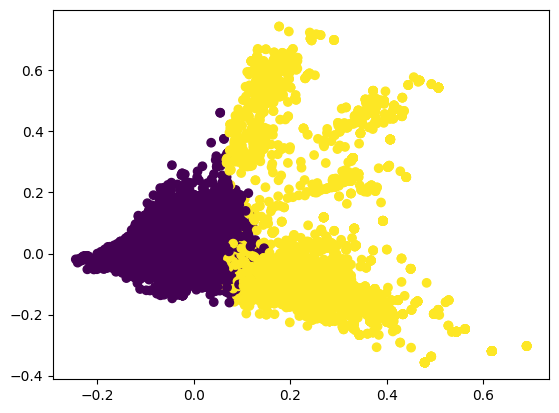

In [126]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters, n_init='auto')
km.fit(tfidf_matrix)

pca = PCA(n_components=num_clusters, random_state=42)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
reduced_cluster_centers = pca.transform(km.cluster_centers_)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=km.predict(tfidf_matrix))